In [ ]:
import numpy as np

vectorToSave = []
for item in range(10):
    vectorToSave.append(input())

print (vectorToSave)

matrizToSave = []
row = []
for i in range(2):
    for j in range(2):
        row.append(input())
    matrizToSave.append(row)
print (matrizToSave)

matrizNumpy = np.zeros((2,2))
print(matrizNumpy)

In [7]:
%matplotlib inline

import time

import cv2
import gluoncv as gcv
import mxnet as mx

net = gcv.model_zoo.get_model('ssd_512_mobilenet1.0_voc', pretrained=True)
 
cap = cv2.VideoCapture(0)
time.sleep(1)

while(1):
    # Load frame from the camera
    ret, frame = cap.read()

    # Image pre-processing
    frame = mx.nd.array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)).astype('uint8')
    rgb_nd, frame = gcv.data.transforms.presets.ssd.transform_test(frame, short=480, max_size=480)

    # Run frame through network
    class_IDs, scores, bounding_boxes = net(rgb_nd)

    # Display the result
    img = gcv.utils.viz.cv_plot_bbox(frame, bounding_boxes[0], scores[0], class_IDs[0], class_names=net.classes)
    gcv.utils.viz.cv_plot_image(img)

    # Break loop
    if (cv2.waitKey(30) & 0xff) == 27:
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\DanielDesktop\Anaconda3\lib\site-packages\mxnet\gluon\block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [14]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [=======================

TypeError: Image data of dtype object cannot be converted to float

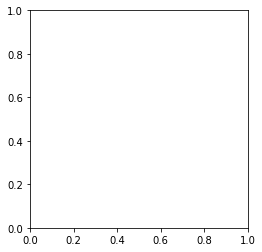

In [51]:
import cv2
import numpy as np
img = []
img.append(cv2.imread('teste/2.png'))
img.append(cv2.imread('teste/0.png'))
img.append(cv2.imread('teste/3.png'))
img.append(cv2.imread('teste/5.png'))

for i in range(len(img)):
    img[i] = cv2.resize(img[i],(28,28))
    img[i] = np.array(img[i])
    img[i] = img[i].reshape((-1, 28, 28,1))
    
    classes = model.predict(img[i])[0]
    bestclass = ''
    bestconf = -1
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if (classes[n] > bestconf):
            bestclass = str(n)
            bestconf = classes[n]
    print (bestclass)